<a href="https://colab.research.google.com/github/SulaimanAlluhaib/Predicting-Online-Shoppers-Purchasing-Intentions/blob/main/Predicting-Online-Shoppers-Purchasing-Intentions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/online_shoppers_intention.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate target variable
y = data['Revenue']
X = data.drop(columns=['Revenue'])

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert back to DataFrame for ease of use
X_preprocessed = pd.DataFrame(X_preprocessed, columns=numerical_cols.tolist() + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)))

X_preprocessed.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


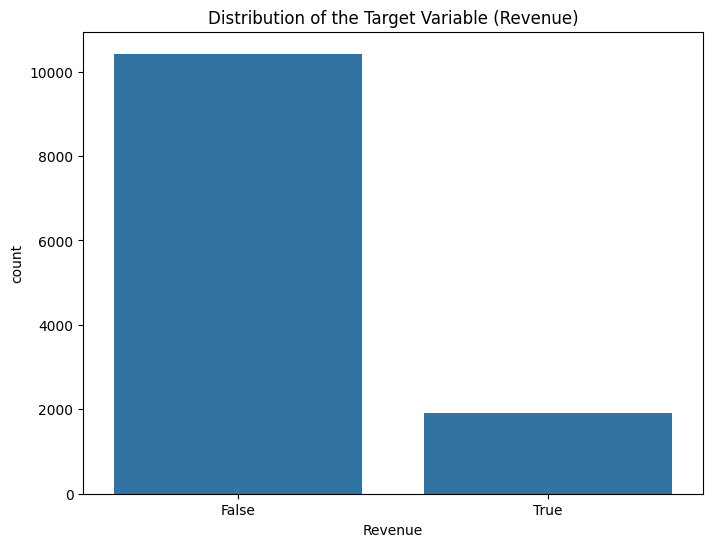

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = data.describe()

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=data)
plt.title('Distribution of the Target Variable (Revenue)')
plt.show()

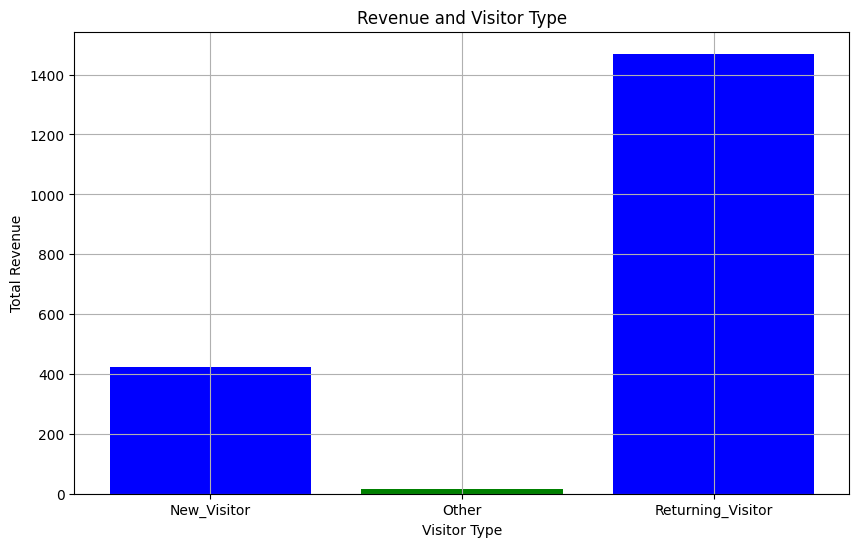

In [5]:
# Create a new column for the revenue as integer
data['Revenue_int'] = data['Revenue'].astype(int)

# Group the data by VisitorType and calculate the sum of Revenue
visitor_revenue = data.groupby('VisitorType')['Revenue_int'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(visitor_revenue['VisitorType'], visitor_revenue['Revenue_int'], color=['blue', 'green'])
plt.xlabel('Visitor Type')
plt.ylabel('Total Revenue')
plt.title('Revenue and Visitor Type')
plt.grid(True)
plt.savefig("revenue_visitor_type.png")
plt.show()

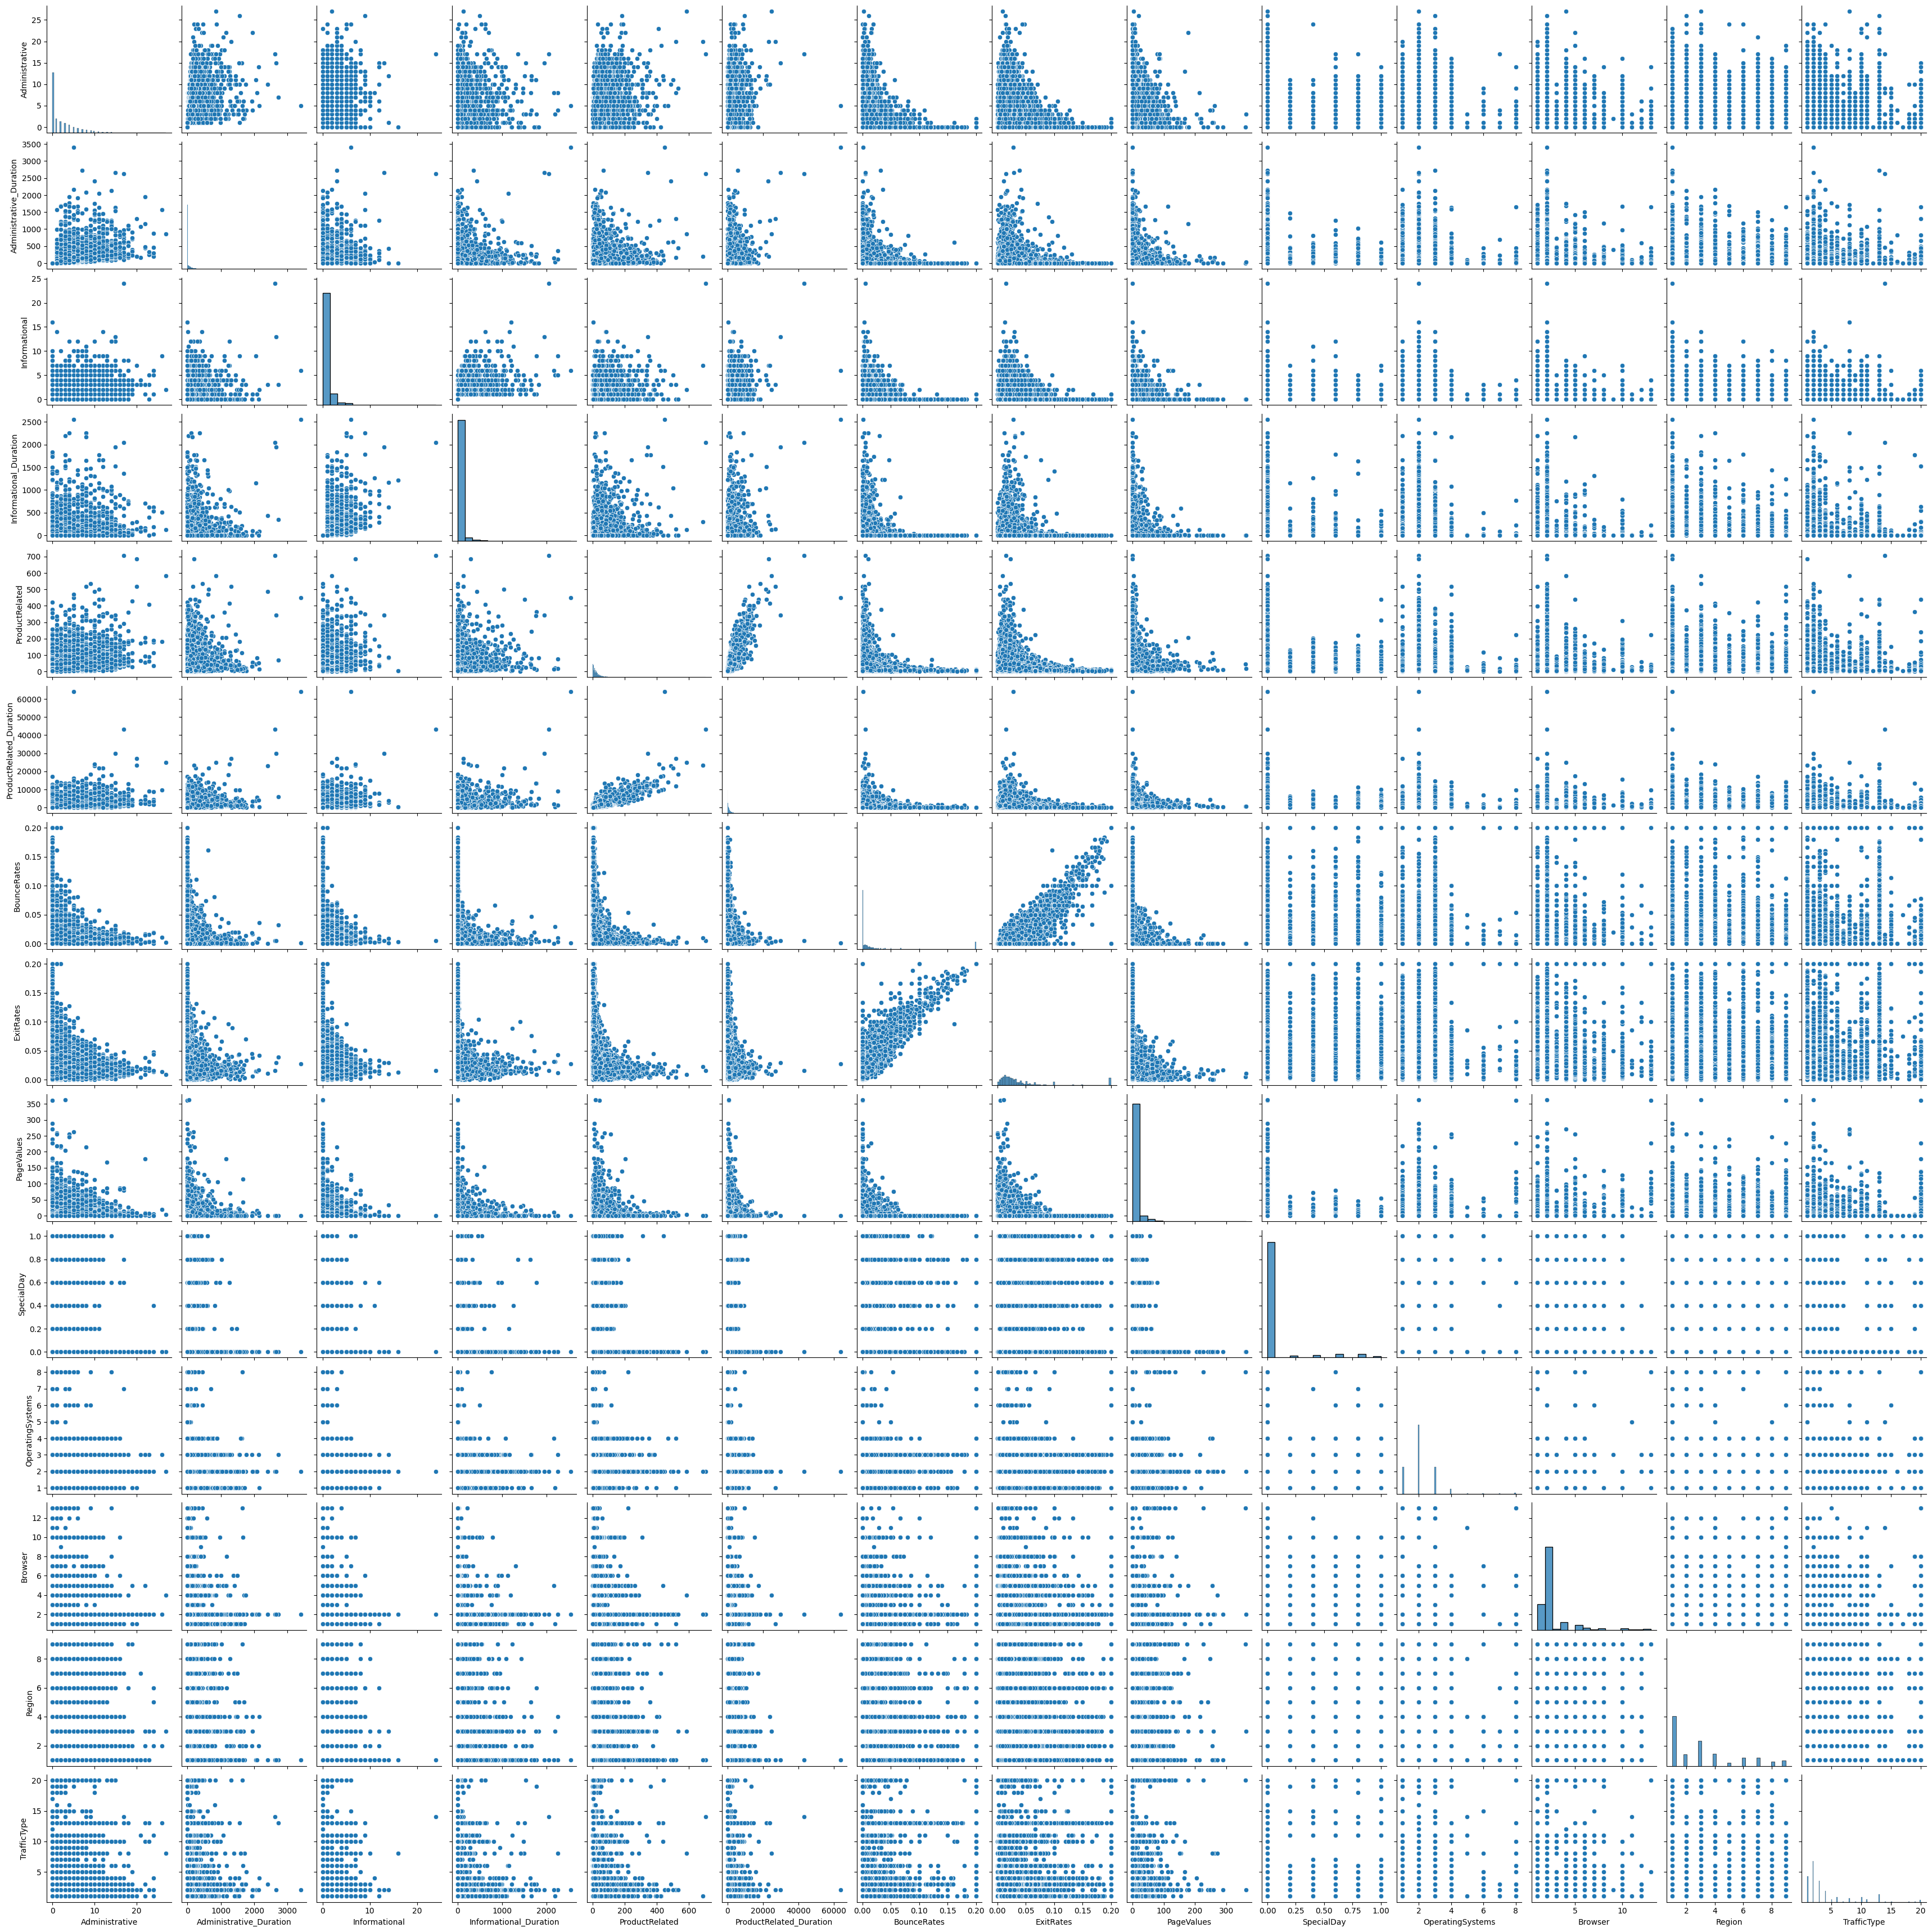

In [6]:
# Pairplot of numerical attributes
sns.pairplot(data[numerical_cols])
plt.show()

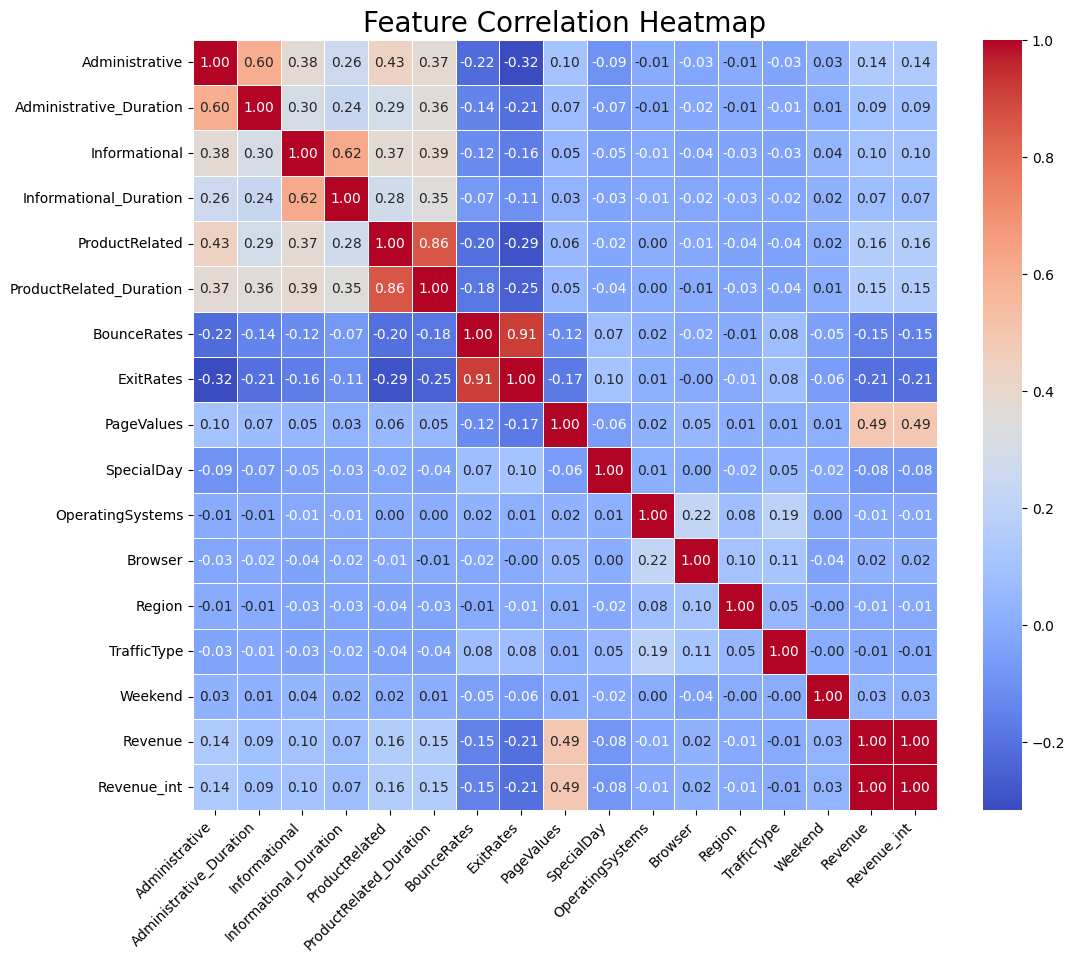

In [7]:
# Convert categorical variables to numeric or drop them if not needed
# Here we drop 'Month' and 'VisitorType' for simplicity
data_encoded = data.drop(['Month', 'VisitorType'], axis=1)

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Feature Correlation Heatmap', size=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),  # Increased max_iter
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.872263,0.752632,0.347932,0.475874
Random Forest,0.890105,0.738095,0.527981,0.615603


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define parameter grids
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Changed 'auto' to 'sqrt'
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, scoring='f1')
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Best parameters
best_params_lr = grid_search_lr.best_params_
best_params_rf = grid_search_rf.best_params_

best_params_lr, best_params_rf


({'C': 1, 'solver': 'lbfgs'},
 {'criterion': 'entropy',
  'max_depth': 8,
  'max_features': 'sqrt',
  'n_estimators': 300})

In [11]:
# Evaluate best models
best_model_lr = grid_search_lr.best_estimator_
best_model_rf = grid_search_rf.best_estimator_

y_pred_lr = best_model_lr.predict(X_test)
y_pred_rf = best_model_rf.predict(X_test)

results_best_models = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Precision': precision_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
        'F1 Score': f1_score(y_test, y_pred_lr)
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf)
    }
}

results_best_models_df = pd.DataFrame(results_best_models).T
results_best_models_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.872263,0.752632,0.347932,0.475874
Random Forest,0.892133,0.782101,0.489051,0.601796


In [12]:
!pip install streamlit pycaret pyngrok pandas



In [13]:


from pycaret.classification import setup, compare_models, tune_model, evaluate_model

# Step 3: Setup PyCaret Environment
clf_setup = setup(data=data, target='Revenue', session_id=42,
                  normalize=True,
                  transformation=True,
                  ignore_features=['ID'],
                  fix_imbalance=True,
                  remove_multicollinearity=True,
                  multicollinearity_threshold=0.95)

# Step 4: Compare Models
best_model = compare_models()

# Step 5: Tune the Best Model
tuned_model = tune_model(best_model)

# Step 6: Evaluate the Tuned Model
evaluate_model(tuned_model)

,Description,Value
0,Session id,42
1,Target,Revenue
2,Target type,Binary
3,Original data shape,"(12330, 19)"
4,Transformed data shape,"(18289, 30)"
5,Transformed train set shape,"(14590, 30)"
6,Transformed test set shape,"(3699, 30)"
7,Ignore features,1
8,Numeric features,15
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.7960
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7180
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7410
svm,SVM - Linear Kernel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8250
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6370
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.1450
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7300
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7530
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.9790
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…